In [1]:
"""
Kaggle. https://www.kaggle.com/c/titanic/data
Code is written by reference. https://developers.ascentnet.co.jp/2017/11/24/kaggle-process-review/
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.max_rows', None)
train_df = pd.read_csv('./train.csv')  # training dataframe
test_df  = pd.read_csv('./test.csv')   # test dataframe
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


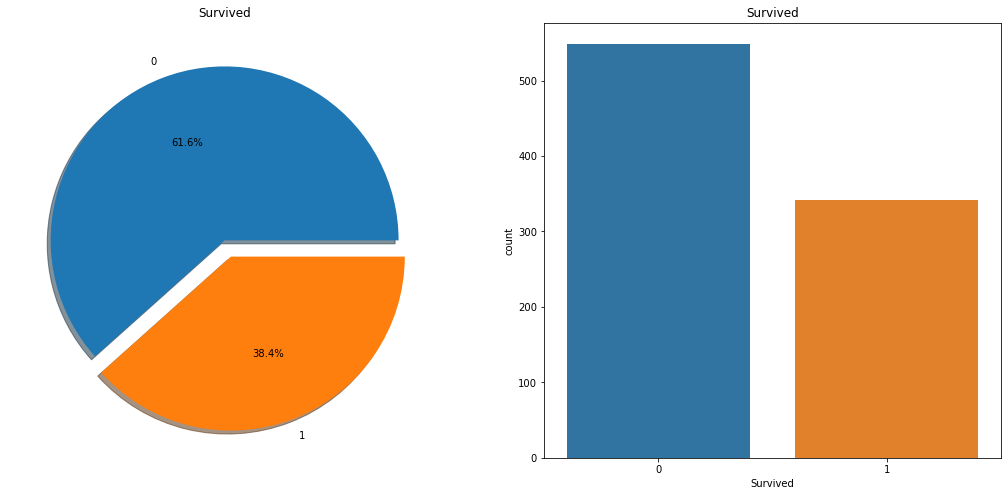

In [2]:
# Check whether data is imbalanced or not.

import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(1, 2, figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

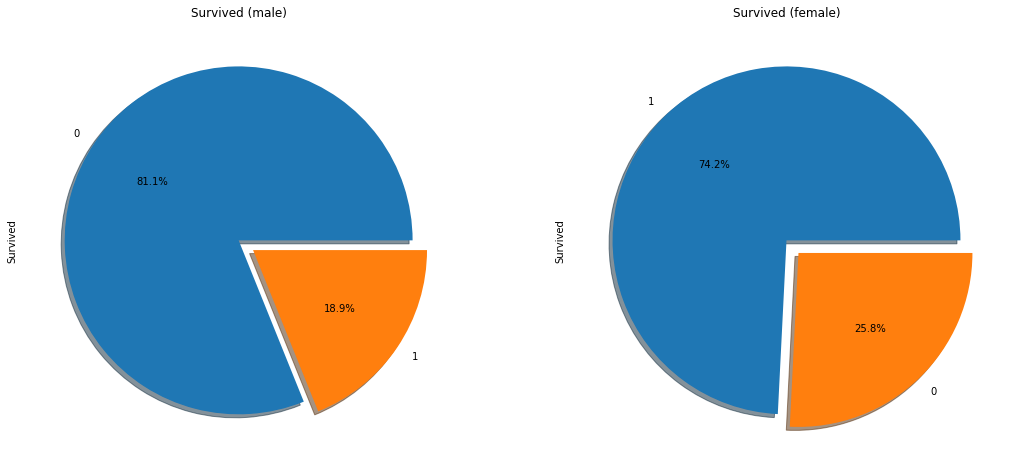

In [3]:
# Survival ratio according to sex. Survival ratio of women is higher than that of men. Maybe.. lady-first?

f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'][train_df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train_df['Survived'][train_df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

In [4]:
# Survival ratio according to pclass. Survial ratio of pclass 1 is highest. 


pd.crosstab([train_df['Survived']],train_df['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


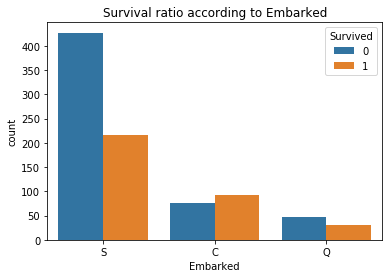

In [5]:
sns.countplot('Embarked',hue='Survived',data=train_df)
plt.title('Survival ratio according to Embarked')
plt.show()

In [6]:
surv_ratio_age = train_df.groupby('Age').mean()['Survived']
surv_ratio_age

Age
0.42     1.000000
0.67     1.000000
0.75     1.000000
0.83     1.000000
0.92     1.000000
1.00     0.714286
2.00     0.300000
3.00     0.833333
4.00     0.700000
5.00     1.000000
6.00     0.666667
7.00     0.333333
8.00     0.500000
9.00     0.250000
10.00    0.000000
11.00    0.250000
12.00    1.000000
13.00    1.000000
14.00    0.500000
14.50    0.000000
15.00    0.800000
16.00    0.352941
17.00    0.461538
18.00    0.346154
19.00    0.360000
20.00    0.200000
20.50    0.000000
21.00    0.208333
22.00    0.407407
23.00    0.333333
23.50    0.000000
24.00    0.500000
24.50    0.000000
25.00    0.260870
26.00    0.333333
27.00    0.611111
28.00    0.280000
28.50    0.000000
29.00    0.400000
30.00    0.400000
30.50    0.000000
31.00    0.470588
32.00    0.500000
32.50    0.500000
33.00    0.400000
34.00    0.400000
34.50    0.000000
35.00    0.611111
36.00    0.500000
36.50    0.000000
37.00    0.166667
38.00    0.454545
39.00    0.357143
40.00    0.461538
40.50    0.000000
41.00 

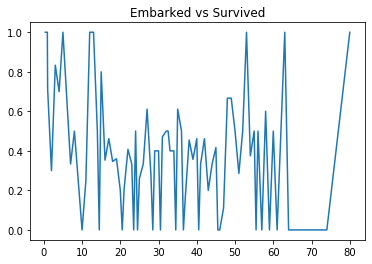

In [7]:
plt.plot(surv_ratio_age.index, surv_ratio_age)
plt.title('Embarked vs Survived')
plt.show()

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
def preprocessing(df):
    df.drop(['Cabin', 'Name', 'Ticket', 'Age'], axis=1, inplace=True)
    df.Sex.replace('male', 0, inplace=True)
    df.Sex.replace('female', 1, inplace=True)
    df.Embarked.replace('S', 0, inplace=True)
    df.Embarked.replace('C', 1, inplace=True)
    df.Embarked.replace('Q', 2, inplace=True)
    return df

before_len = len(train_df)
print(f"train_df's length before preprocessing: {before_len}")

train_df = preprocessing(train_df)
train_df.dropna(inplace=True)

after_len = len(train_df)
print(f"train_df's length after: {after_len}")
print(f"{before_len - after_len} rows are removed")

train_df's length before preprocessing: 891
train_df's length after: 889
2 rows are removed


In [11]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
test_df = preprocessing(test_df)
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].mean())
test_df

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,7.829200,2
1,893,3,1,1,0,7.000000,0
2,894,2,0,0,0,9.687500,2
3,895,3,0,0,0,8.662500,0
4,896,3,1,1,1,12.287500,0
5,897,3,0,0,0,9.225000,0
6,898,3,1,0,0,7.629200,2
7,899,2,0,1,1,29.000000,0
8,900,3,1,0,0,7.229200,1
9,901,3,0,2,0,24.150000,0


The accuracy of Val is 0.847457627118644


C:\Users\codez\Anaconda3\envs\deepzero\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


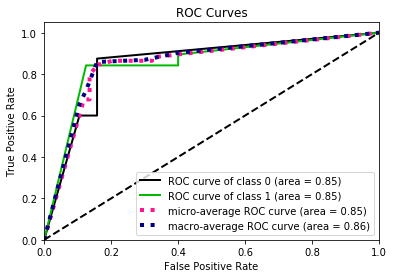

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure

train_df, val_df = train_test_split(train_df, test_size=0.1,random_state=0)

target_col = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_X=train_df[target_col]
train_Y=train_df['Survived']
val_X=val_df[target_col]
val_Y=val_df['Survived']

tree_model = DecisionTreeClassifier()
tree_model.fit(train_X.values, train_Y.values)
dt_prediction = tree_model.predict(val_X.values)
print('The accuracy of Val is',metrics.accuracy_score(dt_prediction, val_Y.values))

# Install foloowing command: conda install -c conda-forge scikit-plot
import scikitplot as skplt
probs = tree_model.predict_proba(val_X.values)
skplt.metrics.plot_roc_curve(val_Y, probs)
plt.show()

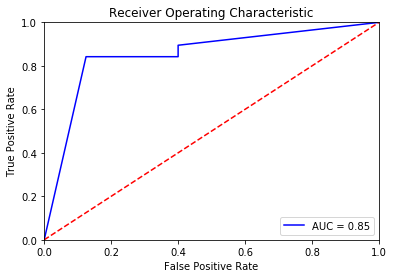

In [22]:
probs = tree_model.predict_proba(val_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(val_Y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
test_df.isnull().sum()

In [ ]:
# predict test data with pre-trained tree model
test_X = test_df[target_col]
dt_prediction_result = tree_model.predict(test_X.values)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test_df["PassengerId"]).astype(int)
dt_solution = pd.DataFrame(dt_prediction_result, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
dt_solution.to_csv("solution.csv", index_label = ["PassengerId"]) 